# Project: Finding Best Three Markets For an E-learning Product

### Introduction
We are going to find the best three markets(countries) to advertise an online Product. Here we are working for an E-learning company which offers online courses on Programming where most of the courses on Web and Mobile development but they also provides other types of Programming related courses like Data science, AI, security. 

We will analyze new coders data, their opinion about learning Programming and their learning path. Mostly we will focus on: 
* Where most of the new coders are located
* How much money they are willing to spend for learning

### Summary of the Result
#### After doing all the analysis and finding the answers of our main questions, we suggest the organization to invest money for advertising most of them in USA and other two options are India and Canada. The distribution could be: 60% in USA + 20% in India + 20% in Canada


### Data Analysis and Visualization
At the first step, we need a relialble dataset of new coders, their interest, opinion and other things. Here we have our data from [Freecodecamp 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/) as a reliable source, freecodecamp took this survey to their students, who learning Programming to build a career in this field. For analysis we take the cleaned data from the [github](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cleaned_data = pd.read_csv('https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)
fcc_data = pd.DataFrame(cleaned_data)
pd.options.display.max_columns = 150

In [2]:
print('shape: ',fcc_data.shape)
fcc_data.head()

shape:  (18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

We get that the dataset has 136 columns, 18175 rows also we see that there is a number of null values in most of the columns. After a little Research on the columns meaning, we select some of them which are very important to continue our Research and making descision. **The columns are 'AttendedBootcamp', 'BootcampFinish', 'BootcampName', 'CountryLive', 'JobRoleInterest', 'MoneyForLearning', 'MonthsProgramming'**

To check the coders interest on learning and career path, we get the column **JobRoleInterest** which descriebes their interest on career path. 

In [3]:
print(fcc_data['JobRoleInterest'].describe())
print('Null_values: ',fcc_data['JobRoleInterest'].isnull().sum())

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object
Null_values:  11183


Here we see that their is 11183 of total 18175 people who did not know their Job rule interest until then. So, it shows that it is more likely to most of the learners here is at novice level, don't know much about industry and career.

In [4]:
all_interests = fcc_data['JobRoleInterest'].dropna().copy()
all_interests_len = all_interests.str.split(',').apply(len)
all_interests_len.value_counts(normalize=True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

***Calculating Relative frequency of the lenth of fields of Programming of people, we have that there is only around 32% people who know their learning and career path strictly and rest of them has mixed of interest.*** As Many people has mixed interest so they are more likely to buy our different courses. 

In [7]:
#frequency table
web_or_mobile = all_interests.str.contains('Web Developer|Mobile Developer').value_counts(normalize=True)*100
web_or_mobile

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

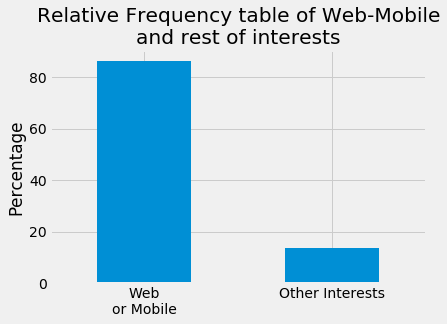

In [8]:
# Graph of the frequency table 
plt.style.use('fivethirtyeight')
web_or_mobile.plot.bar()
plt.title('Relative Frequency table of Web-Mobile\nand rest of interests')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['Web\nor Mobile', 'Other Interests'], rotation=0)
plt.show()


**We get that, around 86 percent students of here are interested on Web or Mobile Develepment and our organization are providing most of the courses on these topic. It shows that, these people could be our targeted buyers and we can continue our analysis with the dataset we have.**

### Now we will start our work to find the answer our first questions where most of the students live. 

In [9]:
intersets_region = fcc_data[fcc_data['JobRoleInterest'].notnull()].copy()
intersets_region['CountryLive'].value_counts(normalize=True).head()*100 # Frequency table

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Name: CountryLive, dtype: float64

### The Frequency table shows that most of our targated customers are live in USA, India, UK, and Canada. After getting the Answer of our final questions we will decide our final decision of selecting Best Three markets.

We have **MoneyForLearning and MonthsProgramming** column to analyze students expenditure for learning Programming where MoneyForLearning coulumn describes how much money they spent in number of MonthsProgramming. We want to find the amount of money they have spent a month as our company allows courses for $50 every month. 

In [33]:
intersets_region['MonthsProgramming'].replace(0, 1, inplace=True)
intersets_region['money_spent_mon'] = intersets_region['MoneyForLearning']/intersets_region['MonthsProgramming']
intersets_region = intersets_region[intersets_region['money_spent_mon'].notnull()]
intersets_region = intersets_region[intersets_region['CountryLive'].notnull()]
intersets_region['money_spent_mon'].describe()

count     6212.000000
mean       178.916585
std       1575.382486
min          0.001344
25%          0.200000
50%          1.000000
75%         33.333333
max      80000.000000
Name: money_spent_mon, dtype: float64

In [35]:
countries_mean = intersets_region.groupby('CountryLive').mean()
countries_mean['money_spent_mon'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    228.176386
India                       135.255977
United Kingdom               45.722949
Canada                      113.701095
Name: money_spent_mon, dtype: float64

Here we get that, On Average our every targeted customers of USA spend 228 dollar per month and for india the value is 135 dollar. But for UK it is only 45 dollar. As we have 45 percent population from USA, it is more likely to be correct the value of USA relative to the rest of them. As we have lower portion of population for the other three countries, we have to analyze the relative columns of the countries.

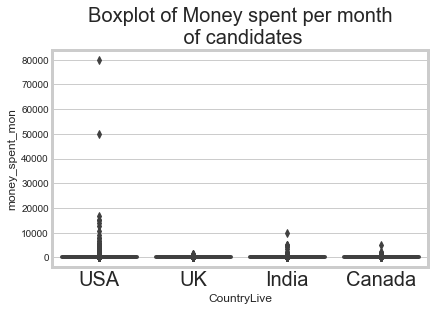

In [95]:
best_4 = intersets_region[intersets_region['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
# for_box = pd.DataFrame({'Country': best_4['CountryLive'], 'money_month': best_4['money_spent_mon']})
sns.set_style("whitegrid")
sns.boxplot(y = 'money_spent_mon', x = 'CountryLive', data = best_4)
plt.title('Boxplot of Money spent per month\n of candidates', fontsize = 20)
plt.xticks([0, 1, 2, 3], ['USA', 'UK', 'India', 'Canada'], fontsize=20)
plt.show()

Boxplot shows that there is some values greater than 10000 dollar for USA and some extreme values for India. So the outlieres in USA an India data have effects our needed average values. As a consequence, we have to remove the outliers.

In [98]:
best_4[best_4['CountryLive']=='United States of America']['money_spent_mon'].describe()

count     2933.000000
mean       228.176386
std       1940.224671
min          0.001344
25%          0.333333
50%          3.333333
75%         50.000000
max      80000.000000
Name: money_spent_mon, dtype: float64

After having quantiles of money_spent_mon we decide that spending greater than 10000 dollar per month of a USA student is extreme, so we have to remove them. 

In [121]:
USA_outliers = best_4[(best_4['CountryLive']=='United States of America')&(best_4['money_spent_mon']>10000)]
best_4 = best_4.drop(USA_outliers.index)
best_4[best_4['CountryLive']=='India']['money_spent_mon'].describe()

count      463.000000
mean       135.255977
std        692.930151
min          0.013889
25%          0.083333
50%          0.833333
75%         13.250000
max      10000.000000
Name: money_spent_mon, dtype: float64

After having quantiles of money_spent_mon we decide that spending greater than 1000 dollar per month of a India student is extreme, so we have to remove them. 

In [122]:
india_outliers = best_4[(best_4['CountryLive']=='India')&(best_4['money_spent_mon']>1000)]
best_4 = best_4.drop(india_outliers.index)
print("")
best_4[best_4['CountryLive']=='India']['money_spent_mon'].describe()
#Now we will check again our boxplot and average of money_spent_mon countrywise

count     452.000000
mean       48.024006
std       157.555949
min         0.013889
25%         0.083333
50%         0.500000
75%        11.812500
max      1000.000000
Name: money_spent_mon, dtype: float64

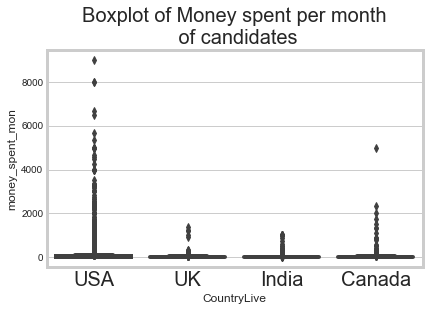

In [123]:
sns.set_style("whitegrid")
sns.boxplot(y = 'money_spent_mon', x = 'CountryLive', data = best_4)
plt.title('Boxplot of Money spent per month\n of candidates', fontsize = 20)
plt.xticks([0, 1, 2, 3], ['USA', 'UK', 'India', 'Canada'], fontsize=20)
plt.show()

### Now our data looks more reliable so we can calculate again the average values of money spent per month.

In [124]:
best_4.groupby('CountryLive').mean()['money_spent_mon'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    155.638065
India                        48.024006
United Kingdom               45.722949
Canada                      113.701095
Name: money_spent_mon, dtype: float64

## Result
* As we get finally that there is 45 percent students from USA are interested on courses we are providing and They are willing to spent average 155 dollar per month on learning this way.
* Around 8% people from India are interested on courses we are providing and They are willing to spent average 48 dollar per month on learning this way.
* Around 5% people from UK are interested on courses we are providing and They are willing to spent average 45 dollar per month on learning this way. But 45 dollar might be not correct as their GDP is better, it might happened for lake of data of UK people. 
* Around 4% people from Canada are interested on courses we are providing and They are willing to spent average 133 dollar per month on learning this way.

### So, we suggest the organization to invest money for advertising most of them in USA and other two options are India and Canada. The distribution could be: 60% in USA + 20% in India + 20% in Canada